in this problem we first have to center our input, output data. this can be done easily by using the following algorithm : 

$$\Phi(x)[i][K] \leftarrow  \Phi(x)[i][K] - np.mean(\Phi[:, K))$$

$$y[i] \leftarrow  y[i] - np.mean(y)$$


where K represents the basis function number ( $ x^K $) while i is just the index of the i-th training sample, notice that in this way the first column of the the design matrix (with a bias) becomes a null column vector. 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import pymatreader as reader
import matplotlib.pyplot as plt

In [2]:
data = reader.read_mat('Resources_data_problem7.mat')

x = data['x']
y = data['y']

In [3]:
X = np.concatenate([x.reshape((20,1)), (x**2).reshape((20,1)), (x**3).reshape((20,1)), (x**4).reshape((20,1)), (x**5).reshape((20,1))], axis=1)

In [4]:
Y = y

In [5]:
def center_design_matrix(X):
    copy = np.copy(X)
    for j in range(X.shape[1]):
        key = j 
        for i in range(X.shape[0]):
            copy[i][j] = copy[i][j] - np.mean(X[:, j])
            
    return copy

def center_output_vector(y):
    copy = np.copy(y)
    
        
    return copy - np.mean(y) * np.ones(y.shape[0])

In [6]:
X_centered = center_design_matrix(X=X)
y_centered = center_output_vector(y=Y)

In [7]:
X_centered.shape

(20, 5)

In [8]:
y_centered.shape

(20,)

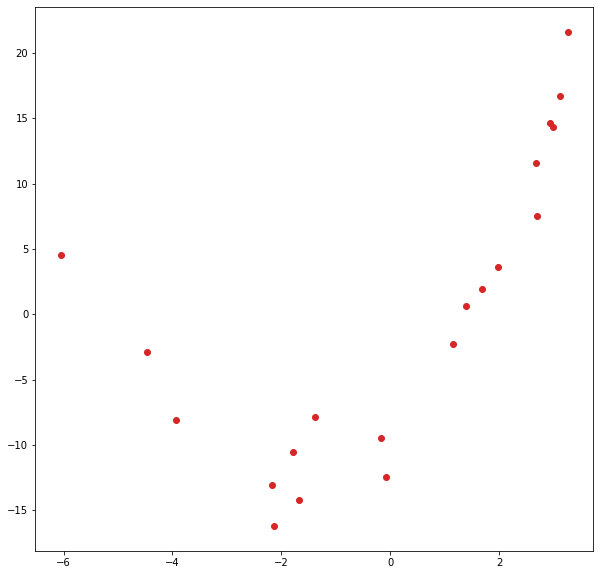

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(X_centered[:,0], y_centered, c=['#d62728'])

In [10]:
from regression import NIGLinearRegression, NormalInverseGamma

# K = 3

In [11]:
gamma = 20000

model = NIGLinearRegression(np.zeros(3), gamma * np.eye(3), 0.1, 0.00001)

model.fit(X_centered[:, :3], y_centered)

In [12]:
sigma2 = model.get_marginal_sigma2()

In [13]:
weights = model.get_conditional_beta(sigma2.mean())

In [14]:
s = np.linspace(-7, 7, 1000)

S = np.concatenate([ s.reshape((1000,1)), (s**2).reshape((1000,1)), (s**3).reshape((1000,1))], axis = 1)

S_new = center_design_matrix(S)

In [15]:
preds = model.predict(S_new)

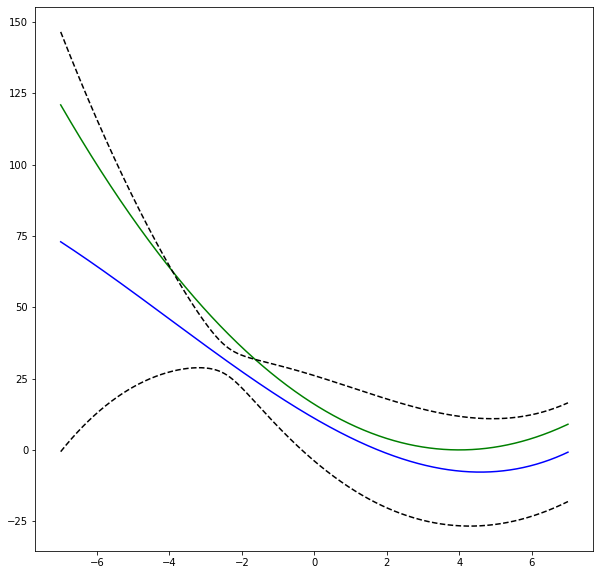

In [16]:
plt.figure(figsize=(10,10))

plt.plot(S_new[:, 0], (S_new[:, 0]-4)**2, 'g')
plt.plot(S_new[:,0], 19.43491948 + preds.mean(), 'b')

plt.plot(S_new[:,0], 19.43491948 + preds.mean() - 2 * preds.var() ** 0.5,linestyle="--", color="black")
plt.plot(S_new[:,0], 19.43491948 + preds.mean() + 2 * preds.var() ** 0.5,linestyle="--", color="black")